<a href="https://colab.research.google.com/github/auspicious0/insurance/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#우선 패키지를 부착하고 출력 그래프의 크기를 설정한다.
install.packages(c("tidyverse","data.table"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)

library(data.table)

library(repr)
options(repr.plot.width=7,repr.plot.height=7)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




캐글에서 병원비 데이터를 활용해 프로젝트를 진행하겠습니다.

In [ ]:
#https://www.kaggle.com/datasets/mirichoi0218/insurance
#https://drive.google.com/file/d/12KK_QTRPvhvHwim_Mgf0tRz7kpKelhaL/view?usp=sharing
system("gdown --id 12KK_QTRPvhvHwim_Mgf0tRz7kpKelhaL")
system("ls",TRUE)

[1] "depression_anxiety_data.csv" "insurance.csv"              
[3] "sample_data"

잘 읽혀진 것을 확인했습니다. hc(hosepital cost)변수에 저장하겠습니다.

In [ ]:
hc<-fread("insurance.csv",header=T,encoding="UTF-8")%>%as_tibble()
hc%>%show()

# A tibble: 1,338 × 7
     age sex      bmi children smoker region    charges
   <int> <chr>  <dbl>    <int> <chr>  <chr>       <dbl>
 1    19 female  27.9        0 yes    southwest  16885.
 2    18 male    33.8        1 no     southeast   1726.
 3    28 male    33          3 no     southeast   4449.
 4    33 male    22.7        0 no     northwest  21984.
 5    32 male    28.9        0 no     northwest   3867.
 6    31 female  25.7        0 no     southeast   3757.
 7    46 female  33.4        1 no     southeast   8241.
 8    37 female  27.7        3 no     northwest   7282.
 9    37 male    29.8        2 no     northeast   6406.
10    60 female  25.8        0 no     northwest  28923.
# ℹ 1,328 more rows


불러온 데이터를 여러 방면에서 살펴보기 위해 summary, str,table 함수를 수행해보고 boxplot을 통해 시각화 해보겠습니다.


In [ ]:
str(hc)
hc%>%summary()
table(is.na(hc))


tibble [1,338 × 7] (S3: tbl_df/tbl/data.frame)
 $ age     : int [1:1338] 19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr [1:1338] "female" "male" "male" "male" ...
 $ bmi     : num [1:1338] 27.9 33.8 33 22.7 28.9 ...
 $ children: int [1:1338] 0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr [1:1338] "yes" "no" "no" "no" ...
 $ region  : chr [1:1338] "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num [1:1338] 16885 1726 4449 21984 3867 ...
 - attr(*, ".internal.selfref")=<externalptr> 


      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  


FALSE 
 9366 

[1] "female" "male"

[1] "yes" "no"

[1] "southwest" "southeast" "northwest" "northeast"

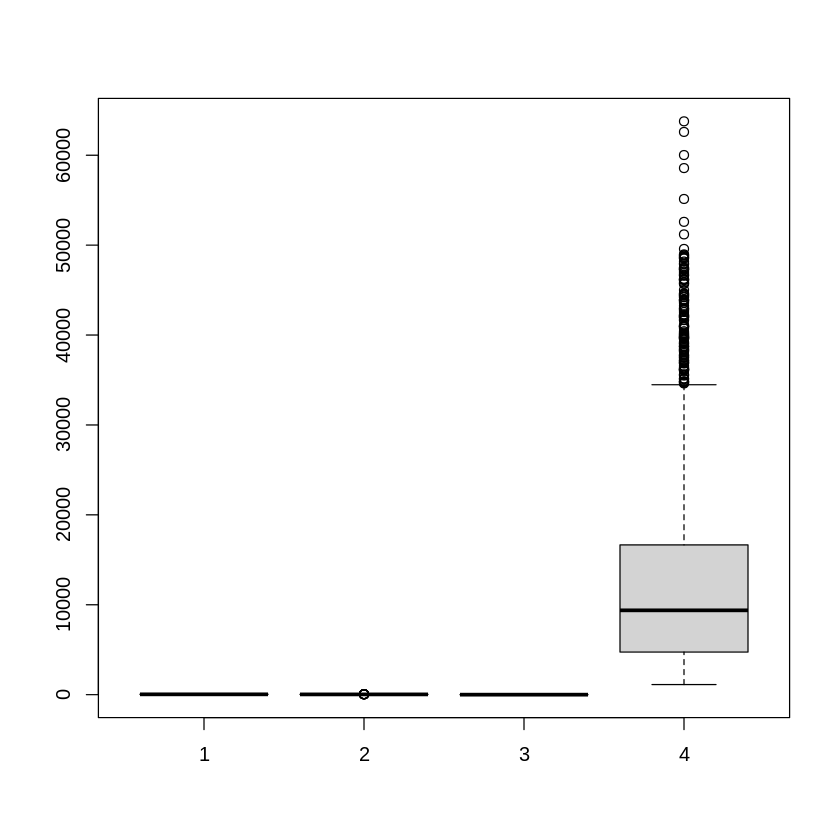

In [ ]:
hc$sex %>% unique()
hc$smoker %>% unique()
hc$region %>% unique()

boxplot(hc$age,hc$bmi,hc$children, hc$charges )

살펴본 바에 따르면 우선 결측값은 없는 것으로 보이고  
sex, smoker, region은 factor로 변경하는 것이 좋을 것으로 보입니다.

charges데이터에서 이상값이 많이 보이고 나머지 데이터도 이상값이 있는 것으로 확인 됩니다. 또 없어 보이더라도 이상값처리를 하는 것이 안전하기 때문에 모든 정수 데이터를 이상값 처리 하겠습니다.

In [ ]:
hc<-hc%>%mutate_at(c("sex","smoker","region"),factor)
hc%>%str()
hc%>%show()


tibble [1,338 × 7] (S3: tbl_df/tbl/data.frame)
 $ age     : int [1:1338] 19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num [1:1338] 27.9 33.8 33 22.7 28.9 ...
 $ children: int [1:1338] 0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num [1:1338] 16885 1726 4449 21984 3867 ...
 - attr(*, ".internal.selfref")=<externalptr> 
# A tibble: 1,338 × 7
     age sex      bmi children smoker region    charges
   <int> <fct>  <dbl>    <int> <fct>  <fct>       <dbl>
 1    19 female  27.9        0 yes    southwest  16885.
 2    18 male    33.8        1 no     southeast   1726.
 3    28 male    33          3 no     southeast   4449.
 4    33 male    22.7        0 no     northwest  21984.
 5    32 male    28.9        0 no     northwest   3867.
 6    31 female  25.7        0 no     southeast

잘 변경된 것으로 보입니다. 이제 이상값 처리를 해보겠습니다.


FALSE  TRUE 
 9218   148 


FALSE 
 8351 

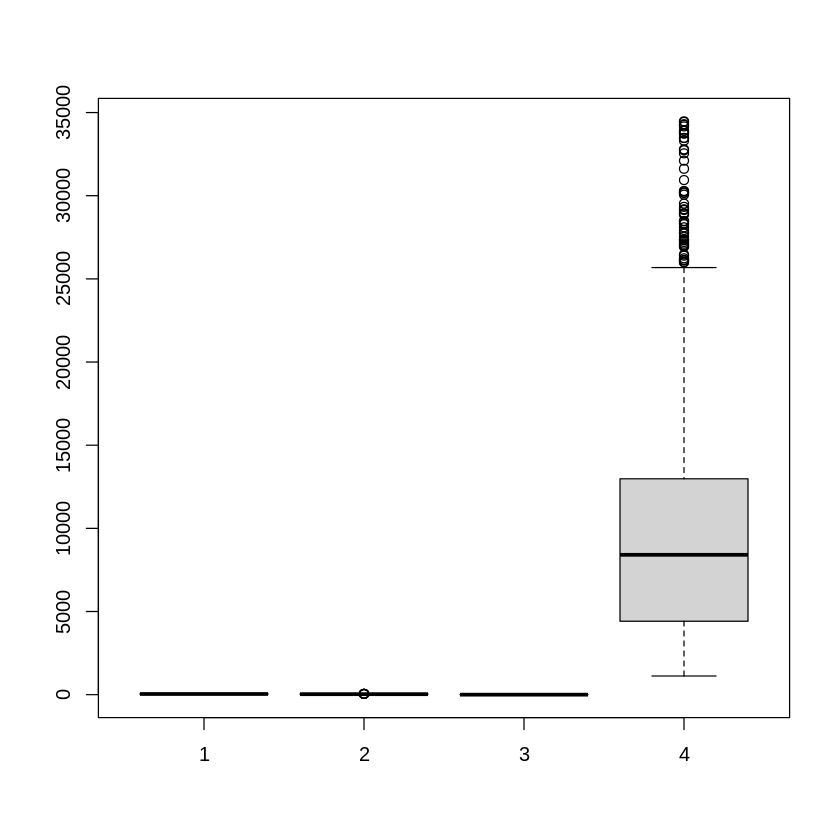

In [ ]:
# 이상치 및 결측값 처리 함수
calculate_outliers <- function(data, column_name) {
  iqr_value <- IQR(data[[column_name]])
  upper_limit <- summary(data[[column_name]])[5] + 1.5 * iqr_value
  lower_limit <- summary(data[[column_name]])[2] - 1.5 * iqr_value

  data[[column_name]] <- ifelse(data[[column_name]] < lower_limit | data[[column_name]] > upper_limit, NA, data[[column_name]])

  return(data)
}

# 이상치 및 결측값 처리 및 결과에 대한 상자그림 그리기
hc <- calculate_outliers(hc, "age")
hc <- calculate_outliers(hc, "bmi")
hc <- calculate_outliers(hc, "age")
hc <- calculate_outliers(hc, "children")
hc <- calculate_outliers(hc, "charges")
table(is.na(hc))
hc <- na.omit(hc)
table(is.na(hc))
boxplot(hc$age,hc$bmi,hc$children, hc$charges )

이상값처리를 완료하였습니다.

hc데이터에서 cor()을 이용하여 상관관계를 분석해보고 산점도와 그림으로 시각화 해보겠습니다.

In [ ]:
install.packages("GGally")
install.packages("PerformanceAnalytics")
install.packages("corrr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





상관관계 분석을 할 것이기 때문에 hc 변수 중 숫자형 변수만을 뽑아내어 다시 hc 변수에 저장하겠습니다.

성별과 흡연 유무 데이터를 정수형 데이터로 변환하겠습니다.

성별
남:0
여:1

흡연:0
비흡연:1



Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

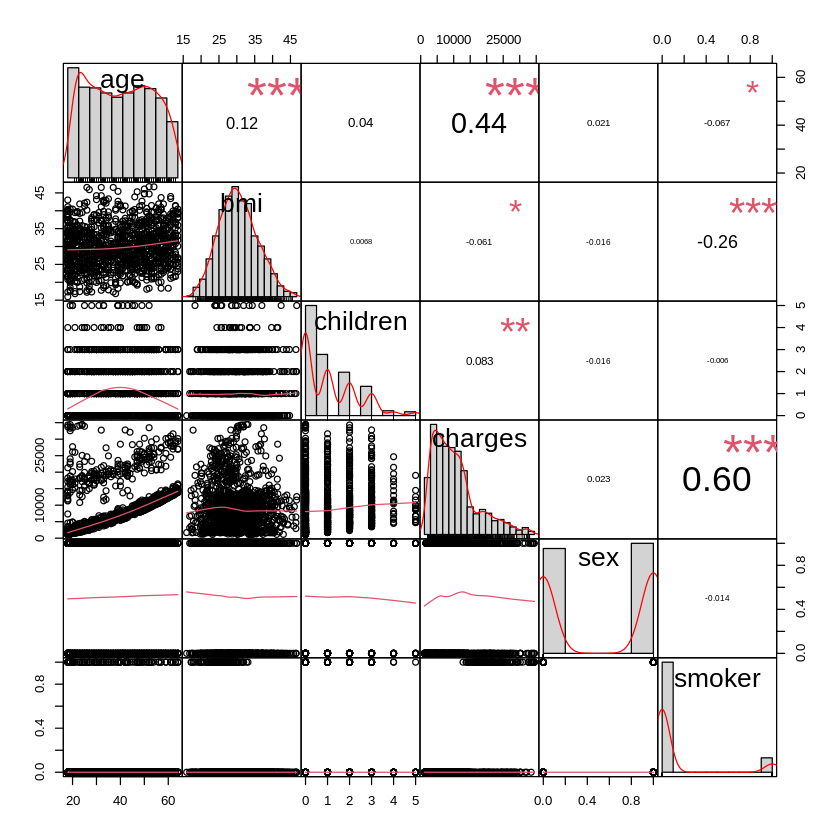

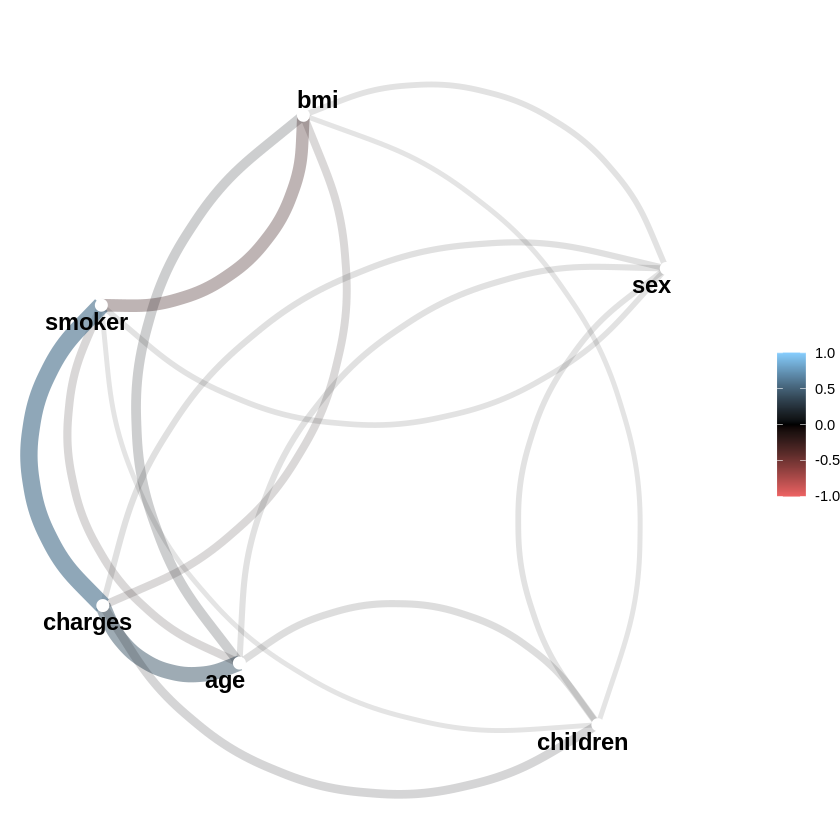

In [ ]:
hc$sex <- ifelse(hc$sex == "male", 0, 1)
hc$smoker <- ifelse(hc$smoker == "no", 0, 1)

hc<-select(hc,age,bmi,children,charges,sex,smoker)
PerformanceAnalytics::chart.Correlation(hc, histogram=TRUE,pch=19)
library(corrr)
hc%>%
  correlate() %>%
  network_plot(min_cor = 0, colours = c("indianred2","black","skyblue1"))

charges 와 smoker charges와 age 사이의 강한 상관관계가 나타나는 것을 확인할 수 있고 smoker와 age사이에 옅은 상관관계를 나타내는 것으로 보아 다중선형회귀 분석을 한다고 할지라도 다중공산성 문제가 발생하지 않을 것임을 예측할 수 있습니다.


가설을 설정해 보겠습니다.

귀무가설: 흡연(smoker)과 나이(age)는 병원비(charges)에 영향을 미치지 않는다.

대립가설: 흡연(smoker)과 나이(age)는 병원비(charges)에 영향을 미친다.


charges: 종속변수, 반응변수

smoker,age: 독립변수, 설명변수

유의수준은 0.05로 하겠습니다.

이어 데이터를 7:3으로 train set, test set으로 나누겠습니다.

In [ ]:
print("train_set")
train_set <- sample_frac(hc,0.7,replace=F) %>% as_tibble
train_set %>% show()

print("test_set")
test_set <-setdiff(hc,train_set) %>% as_tibble()
test_set %>% show()

[1] "train_set"
# A tibble: 835 × 6
     age   bmi children charges   sex smoker
   <int> <dbl>    <int>   <dbl> <dbl>  <dbl>
 1    28  25.8        0   3161.     1      0
 2    63  41.5        0  13405.     0      0
 3    37  36.2        0  19215.     0      0
 4    59  37.4        0  21797.     0      0
 5    39  32.5        1   6238.     1      0
 6    60  33.1        3  13920.     0      0
 7    19  25.6        0   1633.     0      0
 8    49  42.7        2   9801.     1      0
 9    63  39.8        3  15170.     0      0
10    29  29.0        1   4041.     0      0
# ℹ 825 more rows
[1] "test_set"
# A tibble: 357 × 6
     age   bmi children charges   sex smoker
   <int> <dbl>    <int>   <dbl> <dbl>  <dbl>
 1    46  33.4        1   8241.     1      0
 2    60  25.8        0  28923.     1      0
 3    52  30.8        1  10797.     1      0
 4    23  23.8        0   2395.     0      0
 5    60  36.0        0  13229.     1      0
 6    18  34.1        0   1137.     0      0
 7    63  2

앞서 구한 train_set을 바탕으로

charges, age와 관련된 단순 선형회귀 모델 age_model

charges, smoker와 관련된 단순 선형회귀 모델 smoker_model

모든 변수를 포함한 다중 선형회귀 모델 hc_models 을 구하고 통계값을 출력하겠습니다.

In [ ]:
print("age_model = charges ~ age")

age_model <- lm(formula = charges ~ age, data=train_set)
summary(age_model)

print("smoker_model = charges ~ smoker")

smoker_model <- lm(formula = charges ~ smoker, data=train_set)
summary(smoker_model)


print("hc_models = charges ~ .")

hc_models <- lm(formula = charges ~ ., data=train_set)
summary(hc_models)

[1] "age_model = charges ~ age"



Call:
lm(formula = charges ~ age, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-4811.5 -3572.1 -2466.7  -893.3 28825.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1724.94     645.84   2.671  0.00771 ** 
age           204.73      15.55  13.170  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6291 on 833 degrees of freedom
Multiple R-squared:  0.1723,	Adjusted R-squared:  0.1713 
F-statistic: 173.4 on 1 and 833 DF,  p-value: < 2.2e-16


[1] "smoker_model = charges ~ smoker"



Call:
lm(formula = charges ~ smoker, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7957.4 -4201.1  -931.6  3104.6 23858.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8250.4      201.0   41.05   <2e-16 ***
smoker       13454.9      605.6   22.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5479 on 833 degrees of freedom
Multiple R-squared:  0.3721,	Adjusted R-squared:  0.3714 
F-statistic: 493.7 on 1 and 833 DF,  p-value: < 2.2e-16


[1] "hc_models = charges ~ ."



Call:
lm(formula = charges ~ ., data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-5316.9 -1726.1 -1141.4  -381.6 24229.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3134.60     933.38  -3.358  0.00082 ***
age           235.60      10.84  21.739  < 2e-16 ***
bmi            45.22      26.97   1.676  0.09405 .  
children      320.65     123.56   2.595  0.00963 ** 
sex           609.17     300.57   2.027  0.04301 *  
smoker      14753.45     496.80  29.697  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4336 on 829 degrees of freedom
Multiple R-squared:  0.6087,	Adjusted R-squared:  0.6064 
F-statistic: 257.9 on 5 and 829 DF,  p-value: < 2.2e-16


우선 단순 선형회귀 모델은 모두 계수와 각 변수(age,smoker)들과 p-value 값 모두 유의수준 보다 낮음을 확인할 수 있습니다.

하지만 두 선형회귀 모델 모두 Adusted R-squared가 매우 낮게 형성되어 있습니다. 따라서 설명력이 낮을 것으로 보여집니다.

또 다중 선형회귀 모델은 bmi를 제외하면 모두 계수와 각 변수들과 p-value 값 모두 유의수준 보다 낮음을 확인할 수 있습니다.

또 Adusted R-squared가 60퍼센트인 것으로 보아 어느정도 설명력을 지니고 있음을 확인할 수 있습니다.

하지만 설명변수의 개수는 적을 수록 유리하기 때문에 반응변수와 높은 상관관계를 갖고 있는
 smoker와 age변수를 제외하고 모두 삭제하겠습니다.

아쉬우니 단순선형회귀선을 그려보고 다중선형회귀모델을 만들겠습니다.

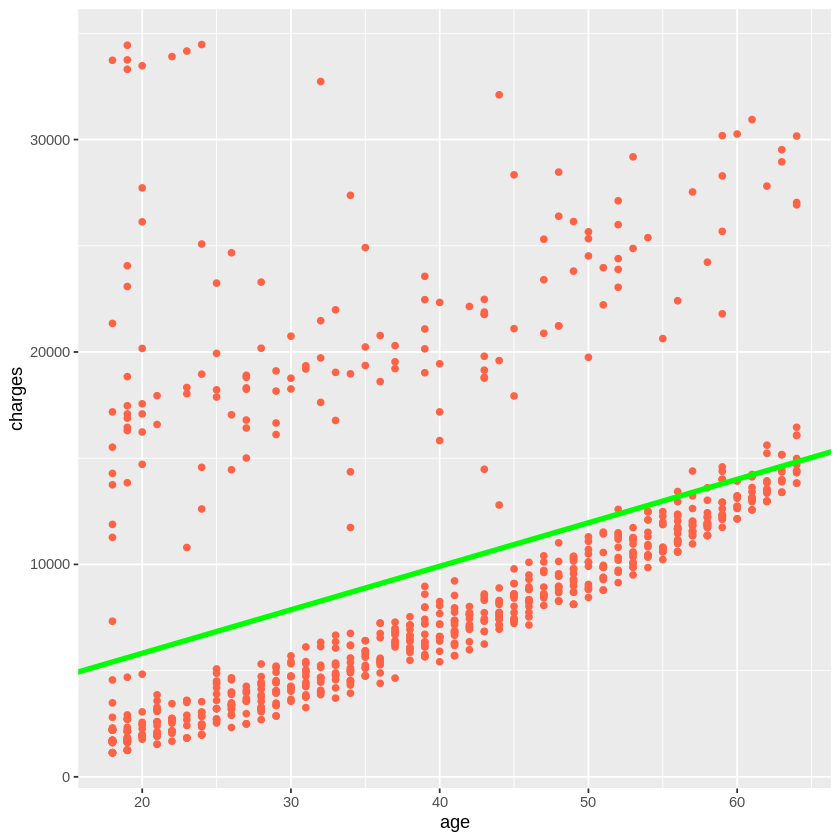

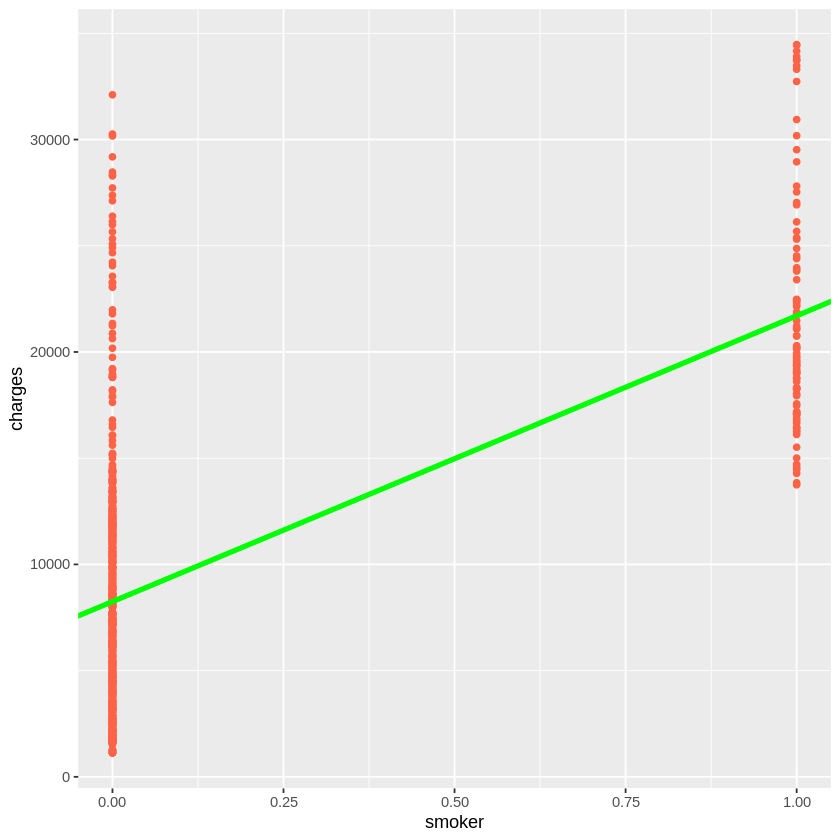

In [ ]:
train_set %>% ggplot(aes(x=age, y=charges))+
  geom_point(color = "tomato")+
  geom_abline(intercept = coef(age_model)[1],slope = coef(age_model)[2],color = "green",size=1.5)

train_set %>% ggplot(aes(x=smoker,y=charges))+
  geom_point(color = "tomato")+
  geom_abline(intercept = coef(smoker_model)[1],slope = coef(smoker_model)[2],color="green",size=1.5)

앞서 언급했던 대로 상관관계가 가장 높은 두 개의 변수(age, smoker)를 설명변수로 하고 charges를 반응변수로 하는 다중 선형회귀 모델 hc_models 을 구하고 통계값을 출력해보겠습니다.

In [ ]:
print("hc_models = charges ~ .")

hc_models <- lm(formula = charges ~ age + smoker, data=train_set)
summary(hc_models)

[1] "hc_models = charges ~ ."



Call:
lm(formula = charges ~ age + smoker, data = train_set)

Residuals:
   Min     1Q Median     3Q    Max 
 -5705  -1778  -1177   -347  24143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1178.37     458.14  -2.572   0.0103 *  
age           237.99      10.84  21.964   <2e-16 ***
smoker      14543.51     484.61  30.011   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4362 on 832 degrees of freedom
Multiple R-squared:  0.6026,	Adjusted R-squared:  0.6016 
F-statistic: 630.7 on 2 and 832 DF,  p-value: < 2.2e-16


모든 변수들과, p-value 모두 유의수준 보다 낮고 Adjusted R-squared가 60퍼센트로 어느 정도 설명력을 확보했으며 앞서 그림으로 살펴 보앗듯 다중공선성 문제는 없을 것으로 판단 되어지기 때문에 귀무가설을 기각하고 대립가설을 채택하겠습니다.


또 scatterplot3d(), plane3d()를 이용하여 3차원 그래프로 나타내 보겠습니다.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



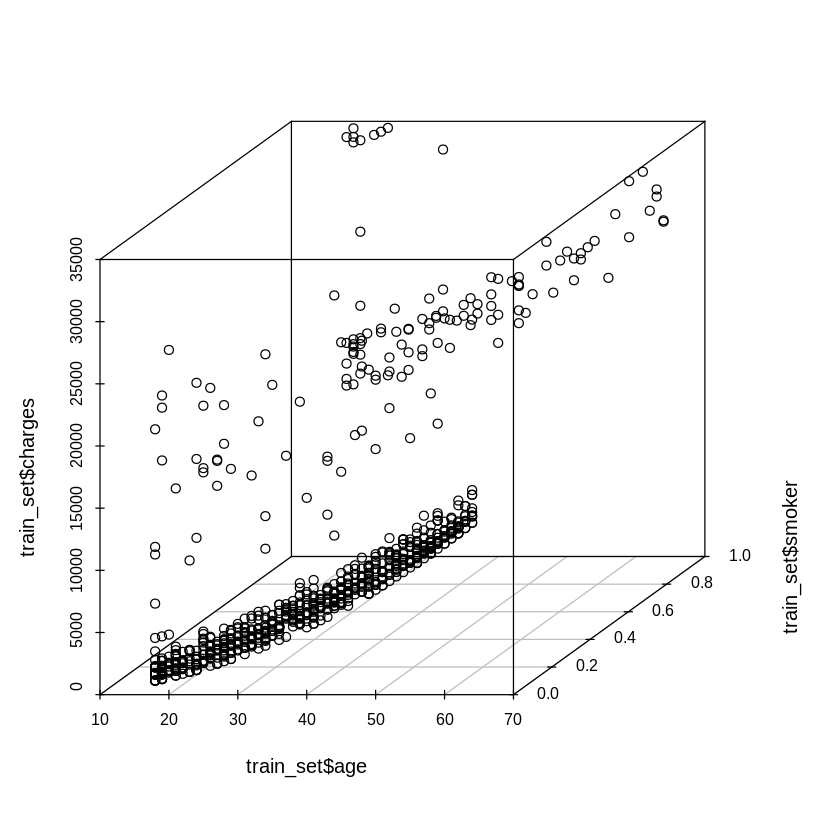

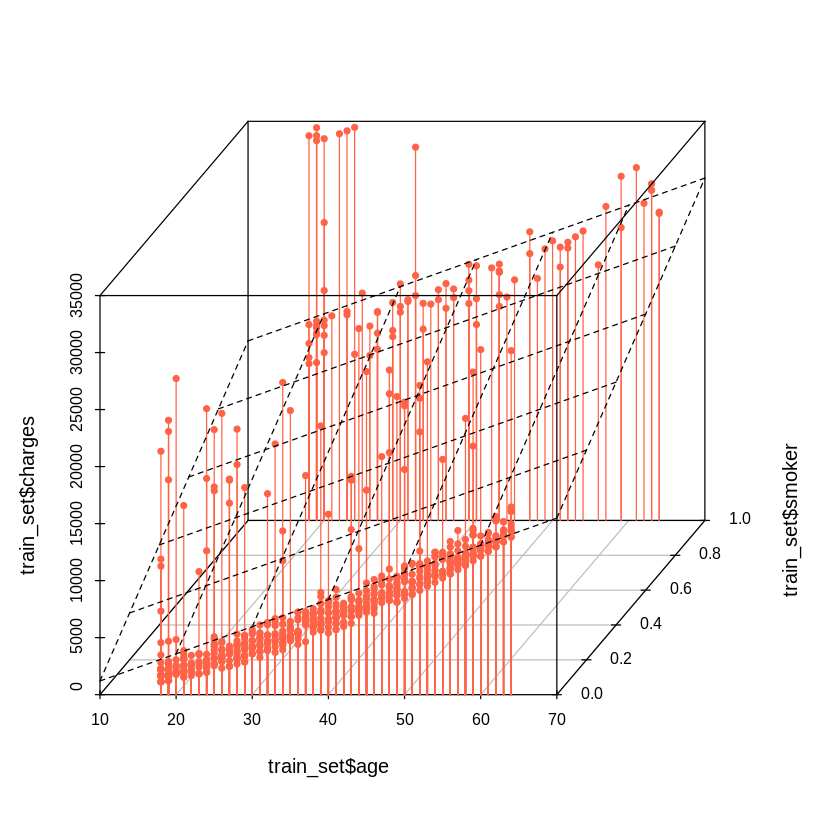

In [ ]:
install.packages("scatterplot3d")
library(scatterplot3d)

options(repr.plot.width=7, repr.plot.height = 7)
scatterplot3d(train_set$age,train_set$smoker,train_set$charges, angle=40)

s<-scatterplot3d(train_set$age,train_set$smoker,train_set$charges,pch=20,type='h', angle=55,color='tomato')
s$plane3d(hc_models)

이제 마지막으로 예측을 수행해 보겠습니다.

In [ ]:
print("test_set을 이용한 predict")
test_set<-test_set %>% mutate(charges_predict = predict(hc_models,test_set))
test_set %>% show()

[1] "test_set을 이용한 predict"
# A tibble: 357 × 7
     age   bmi children charges   sex smoker charges_predict
   <int> <dbl>    <int>   <dbl> <dbl>  <dbl>           <dbl>
 1    46  33.4        1   8241.     1      0           9769.
 2    60  25.8        0  28923.     1      0          13101.
 3    52  30.8        1  10797.     1      0          11197.
 4    23  23.8        0   2395.     0      0           4295.
 5    60  36.0        0  13229.     1      0          13101.
 6    18  34.1        0   1137.     0      0           3106.
 7    63  23.1        0  14452.     1      0          13815.
 8    55  32.8        2  12269.     1      0          11911.
 9    23  17.4        1   2775.     0      0           4295.
10    18  26.3        0   2198.     1      0           3106.
# ℹ 347 more rows


꽤나 근접하게 예측을 수행하는 것을 확인할 수 있습니다. 하지만 많게는 50%까지 예측에 어긋날 적도 있는 것을 확인할 수 있습니다.
따라서 공공의 업무나 병원, 손실이 일어나면 안 되는 데이터 분석에는 활용할 수 없을 것으로 보입니다.
